In [2]:
# Importing all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [3]:
# Load the dataset
file_path = 'spambase.data'

# Since the dataset does not include header information, we need to create column names
# The dataset description indicates there are 57 attributes followed by a class label
attribute_names = 'word_freq_make, word_freq_address, word_freq_all, word_freq_3d, word_freq_our, word_freq_over, word_freq_remove, word_freq_internet, word_freq_order, word_freq_mail, word_freq_receive, word_freq_will, word_freq_people, word_freq_report, word_freq_addresses, word_freq_free, word_freq_business, word_freq_email, word_freq_you, word_freq_credit, word_freq_your, word_freq_font, word_freq_000, word_freq_money, word_freq_hp, word_freq_hpl, word_freq_george, word_freq_650, word_freq_lab, word_freq_labs, word_freq_telnet, word_freq_857, word_freq_data, word_freq_415, word_freq_85, word_freq_technology, word_freq_1999, word_freq_parts, word_freq_pm, word_freq_direct, word_freq_cs, word_freq_meeting, word_freq_original, word_freq_project, word_freq_re, word_freq_edu, word_freq_table, word_freq_conference, char_freq_;, char_freq_(, char_freq_[, char_freq_!, char_freq_$, char_freq_#, capital_run_length_average, capital_run_length_longest, capital_run_length_total, class_label'.split(', ')

# Read the dataset
spambase_df = pd.read_csv(file_path, names=attribute_names)

# Display the head of the dataframe
print(spambase_df.head())

# Display the shape of the dataframe
print(spambase_df.shape)

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

EXPRORATORY DATA ANALYSIS

In [4]:
# Display a summary of the dataframe
print(spambase_df.describe())

       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min         0.000000        0.

In [5]:
# Check for any missing values
missing_values = spambase_df.isnull().sum()
print('Missing values in each column:\n', missing_values)

Missing values in each column:
 word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_fre

In [6]:
# Check the balance of the classes
spam_class_distribution = spambase_df['class_label'].value_counts()
print('Spam class distribution:\n', spam_class_distribution)

Spam class distribution:
 class_label
0    2788
1    1813
Name: count, dtype: int64


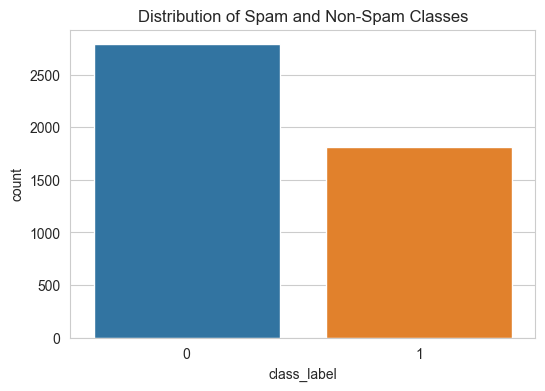

In [7]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plotting the distribution of the spam and non-spam classes
plt.figure(figsize=(6, 4))
sns.countplot(x='class_label', data=spambase_df)
plt.title('Distribution of Spam and Non-Spam Classes')
plt.show()

<Axes: >

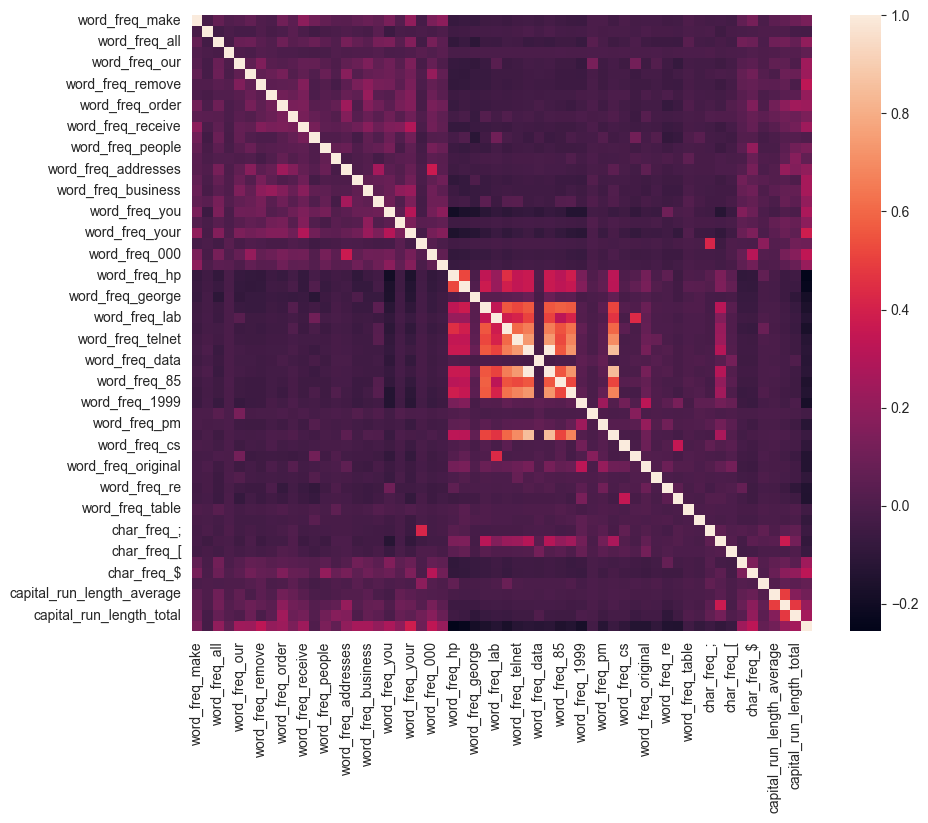

In [8]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = spambase_df.corr()
sns.heatmap(corr_matrix)

In [9]:
# Split the data into features and target variable
X = spambase_df.drop('class_label', axis=1)
y = spambase_df['class_label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Output the shape of the train and test sets
print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)

Training set shape: (3220, 57)
Testing set shape: (1381, 57)


In [10]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Building Neural Network 

In [11]:
# Check if GPU is available and set the device accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [12]:
# Convert the scaled data to torch tensors
X_train_tensor = torch.tensor(X_train_scaled.astype(np.float32)).to(device)
y_train_tensor = torch.tensor(y_train.values.astype(np.float32)).to(device)
X_test_tensor = torch.tensor(X_test_scaled.astype(np.float32)).to(device)
y_test_tensor = torch.tensor(y_test.values.astype(np.float32)).to(device)

In [13]:
# Create TensorDatasets for the training and testing data
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders for the training and testing data
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

In [14]:
# Define the neural network architecture with 3 hidden layers
class SpamClassifier1(nn.Module):
    def __init__(self, activation_fn):
        super(SpamClassifier1, self).__init__()
        self.fc1 = nn.Linear(57, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.activation_fn = activation_fn()

    def forward(self, x):
        x = self.activation_fn(self.fc1(x))
        x = self.activation_fn(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

In [15]:
# Define the neural network architecture with 4 hidden layers
class SpamClassifier2(nn.Module):
    def __init__(self, activation_fn):
        super(SpamClassifier2, self).__init__()
        self.fc1 = nn.Linear(57, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)
        self.activation_fn = activation_fn()

    def forward(self, x):
        x = self.activation_fn(self.fc1(x))
        x = self.activation_fn(self.fc2(x))
        x = self.activation_fn(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x


In [16]:
# Initialize the neural network

# Model selection
classifier_options = {
    "SpamClassifier_ReLU_3Layer": SpamClassifier1(nn.ReLU),
    "SpamClassifier_Tanh_3Layer": SpamClassifier1(nn.Tanh),
    "SpamClassifier_Sigmoid_3Layer": SpamClassifier1(nn.Sigmoid),
    "SpamClassifier_Identity_3Layer": SpamClassifier1(lambda: nn.Identity()),
    "SpamClassifier_ReLU_4Layer": SpamClassifier2(nn.ReLU),
    "SpamClassifier_Tanh_4Layer": SpamClassifier2(nn.Tanh),
    "SpamClassifier_Sigmoid_4Layer": SpamClassifier2(nn.Sigmoid),
    "SpamClassifier_Identity_4Layer": SpamClassifier2(lambda: nn.Identity()),
}

# Select the model
Option = input("Select the model: SpamClassifier_ReLU_3Layer,\n SpamClassifier_Tanh_3Layer,\n SpamClassifier_Sigmoid_3Layer,\n SpamClassifier_Identity_3Layer,\n SpamClassifier_ReLU_4Layer,\n SpamClassifier_Tanh_4Layer,\n SpamClassifier_Sigmoid_4Layer,\n SpamClassifier_Identity_4Layer")

model = classifier_options[Option].to(device)

# Define the loss function and optimizer
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [17]:
# Training the neural network
num_epochs = 10
model.train()
for epoch in range(num_epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output, target.view(-1, 1))
        loss.backward()
        optimizer.step()

    # Print progress
    print('Epoch ', epoch+1, '/', num_epochs, ': Loss -', loss.item())

Epoch  1 / 10 : Loss - 0.15992024540901184
Epoch  2 / 10 : Loss - 0.10760502517223358
Epoch  3 / 10 : Loss - 0.06692877411842346
Epoch  4 / 10 : Loss - 0.11136660724878311
Epoch  5 / 10 : Loss - 0.0676034614443779
Epoch  6 / 10 : Loss - 0.04882027581334114
Epoch  7 / 10 : Loss - 0.034405581653118134
Epoch  8 / 10 : Loss - 0.06581156700849533
Epoch  9 / 10 : Loss - 0.03536110743880272
Epoch  10 / 10 : Loss - 0.02967987395823002


In [18]:
# Evaluate the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        outputs = model(data)
        predicted = outputs.ge(.5).view(-1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = correct / total
print('Test Accuracy: ', accuracy)

Test Accuracy:  0.9341057204923968
